## Assignment Logistic Regression Module 9 "bank_data.csv"

In [2]:
df  <- read.csv("bank_data.csv")

In [4]:
dim(df) # it contains 32 columns and 45211 rows 

[1] 45211    32

### Descriptin of Data 

Output variable -> y
<br>y -> Whether the client has subscribed a term deposit or not 
<br>it is a Binomial ("yes" or "no") type investigation

### Lets Examine the data 

In [7]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [8]:
glimpse(df) # from this view we can see type and inside idea of dataframe

Rows: 45,211
Columns: 32
$ age             <int> 58, 44, 33, 47, 33, 35, 28, 42, 58, 43, 41, 29, 53,...
$ default         <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ balance         <int> 2143, 29, 2, 1506, 1, 231, 447, 2, 121, 593, 270, 3...
$ housing         <int> 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ loan            <int> 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ duration        <int> 261, 151, 76, 92, 198, 139, 217, 380, 50, 55, 222, ...
$ campaign        <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
$ pdays           <int> -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,...
$ previous        <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ poutfailure     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ poutother       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ poutsuccess     <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
$ poutunknown     <int> 1, 

In [9]:
typeof(df) # list type data frame we have  Y is the response variable 

[1] "list"

### Data Pre processing and cleaning

In [10]:
library("Hmisc")

Warning message:
"package 'Hmisc' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units




In [12]:
describe(df) # it seems some missing value ,remove missing value 

df 

 32  Variables      45211  Observations
--------------------------------------------------------------------------------
age 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   45211        0       77    0.999    40.94    11.87       27       29 
     .25      .50      .75      .90      .95 
      33       39       48       56       59 

lowest : 18 19 20 21 22, highest: 90 92 93 94 95
--------------------------------------------------------------------------------
default 
       n  missing distinct     Info      Sum     Mean      Gmd 
   45211        0        2    0.053      815  0.01803   0.0354 

--------------------------------------------------------------------------------
balance 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   45211        0     7168        1     1362     2054     -172        0 
     .25      .50      .75      .90      .95 
      72      448     1428     3574     5768 

lowest :  -8019  -6847  -4057  -3

In [13]:
sum(is.na(df)) # there is no missing value it indicates 

[1] 0

## Brief modeling making

In [20]:
model  <- glm((y >0)~.,data = df,family = binomial)

In [21]:
print(summary(model))# lets remove variable with NA


Call:
glm(formula = (y > 0) ~ ., family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.6748  -0.4060  -0.2731  -0.1625   3.4400  

Coefficients: (4 not defined because of singularities)
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.855e+00  2.447e-01 -15.754  < 2e-16 ***
age              3.567e-04  2.123e-03   0.168 0.866617    
default         -1.822e-01  1.613e-01  -1.130 0.258582    
balance          1.872e-05  4.848e-06   3.860 0.000113 ***
housing         -7.756e-01  3.953e-02 -19.618  < 2e-16 ***
loan            -5.720e-01  5.811e-02  -9.843  < 2e-16 ***
duration         4.048e-03  6.264e-05  64.619  < 2e-16 ***
campaign        -1.093e-01  9.905e-03 -11.037  < 2e-16 ***
pdays            1.441e-04  3.006e-04   0.479 0.631590    
previous         1.042e-02  6.435e-03   1.620 0.105281    
poutfailure      2.563e-01  9.038e-02   2.835 0.004576 ** 
poutother        4.985e-01  1.028e-01   4.849 1.24e-06 ***

In [22]:
attach(df)

The following objects are masked from df (pos = 3):

    age, balance, campaign, con_cellular, con_telephone, con_unknown,
    default, divorced, duration, housing, joadmin., joblue.collar,
    joentrepreneur, johousemaid, jomanagement, joretired,
    joself.employed, joservices, jostudent, jotechnician, jounemployed,
    jounknown, loan, married, pdays, poutfailure, poutother,
    poutsuccess, poutunknown, previous, single, y




In [28]:
final  <- glm((y >0)~.-poutunknown-con_unknown-single-jounknown ,data = df,family = binomial)

In [29]:
print(summary(final))


Call:
glm(formula = (y > 0) ~ . - poutunknown - con_unknown - single - 
    jounknown, family = binomial, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.6748  -0.4060  -0.2731  -0.1625   3.4400  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.855e+00  2.447e-01 -15.754  < 2e-16 ***
age              3.567e-04  2.123e-03   0.168 0.866617    
default         -1.822e-01  1.613e-01  -1.130 0.258582    
balance          1.872e-05  4.848e-06   3.860 0.000113 ***
housing         -7.756e-01  3.953e-02 -19.618  < 2e-16 ***
loan            -5.720e-01  5.811e-02  -9.843  < 2e-16 ***
duration         4.048e-03  6.264e-05  64.619  < 2e-16 ***
campaign        -1.093e-01  9.905e-03 -11.037  < 2e-16 ***
pdays            1.441e-04  3.006e-04   0.479 0.631590    
previous         1.042e-02  6.435e-03   1.620 0.105281    
poutfailure      2.563e-01  9.038e-02   2.835 0.004576 ** 
poutother        4.985e-01  1.028e-01   4.849

In [30]:
exp(coef(final)) # view of data current state

(Intercept)             age         default         balance         housing 
     0.02118167      1.00035672      0.83339910      1.00001872      0.46043208 
           loan        duration        campaign           pdays        previous 
     0.56440759      1.00405573      0.89643728      1.00014415      1.01047743 
    poutfailure       poutother     poutsuccess    con_cellular   con_telephone 
     1.29208605      1.64624413     12.99778207      3.20841569      2.90721486 
       divorced         married        joadmin.   joblue.collar  joentrepreneur 
     0.83848631      0.71218751      1.34516468      0.84612577      0.89824815 
    johousemaid    jomanagement       joretired joself.employed      joservices 
     0.75757682      1.26874376      1.88051972      1.01981818      0.96378877 
      jostudent    jotechnician    jounemployed 
     2.24502192      1.06590788      1.08509561

### lets make our model train test split of data

In [32]:
library(caTools)# will use for split our data 
set.seed(101)

split = sample.split(df$y, SplitRatio = 0.70)

final.train = subset(df, split == TRUE)
final.test = subset(df, split == FALSE)

In [33]:
final  <- glm((y >0)~.-poutunknown-con_unknown-single-jounknown ,data = df,family = binomial)

In [34]:
print(final)


Call:  glm(formula = (y > 0) ~ . - poutunknown - con_unknown - single - 
    jounknown, family = binomial, data = df)

Coefficients:
    (Intercept)              age          default          balance  
     -3.855e+00        3.567e-04       -1.822e-01        1.872e-05  
        housing             loan         duration         campaign  
     -7.756e-01       -5.720e-01        4.048e-03       -1.093e-01  
          pdays         previous      poutfailure        poutother  
      1.441e-04        1.042e-02        2.563e-01        4.985e-01  
    poutsuccess     con_cellular    con_telephone         divorced  
      2.565e+00        1.166e+00        1.067e+00       -1.762e-01  
        married         joadmin.    joblue.collar   joentrepreneur  
     -3.394e-01        2.965e-01       -1.671e-01       -1.073e-01  
    johousemaid     jomanagement        joretired  joself.employed  
     -2.776e-01        2.380e-01        6.315e-01        1.962e-02  
     joservices        jostudent     j

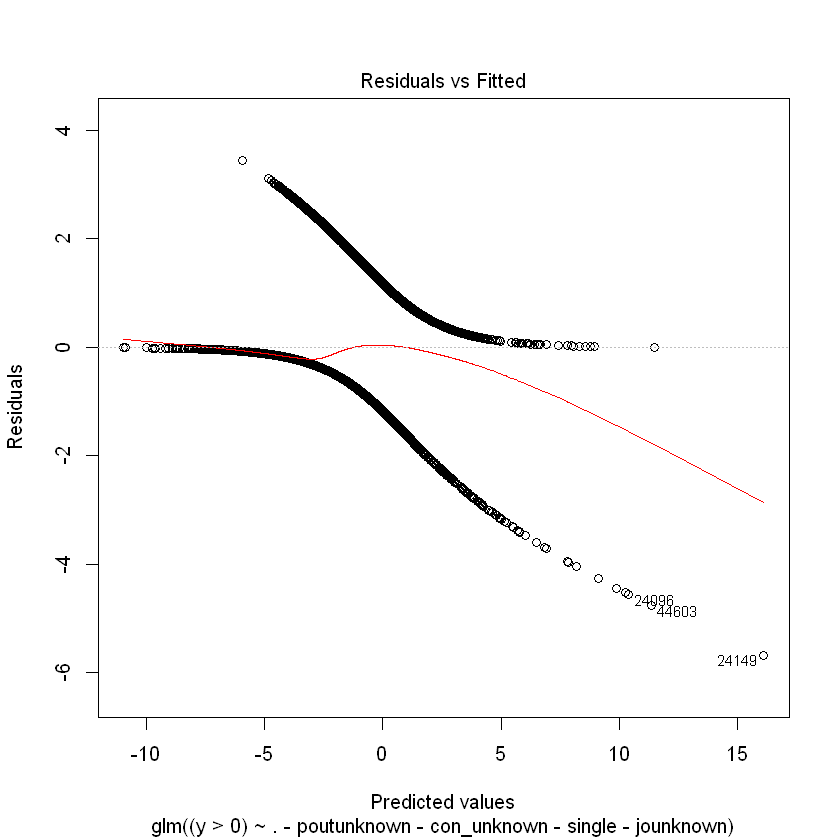

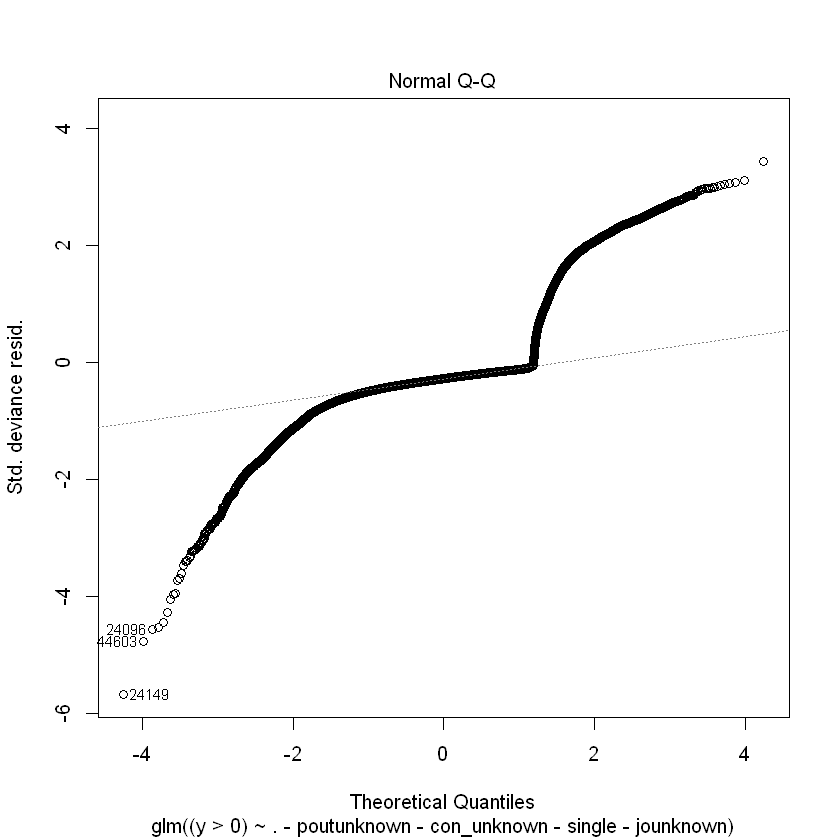

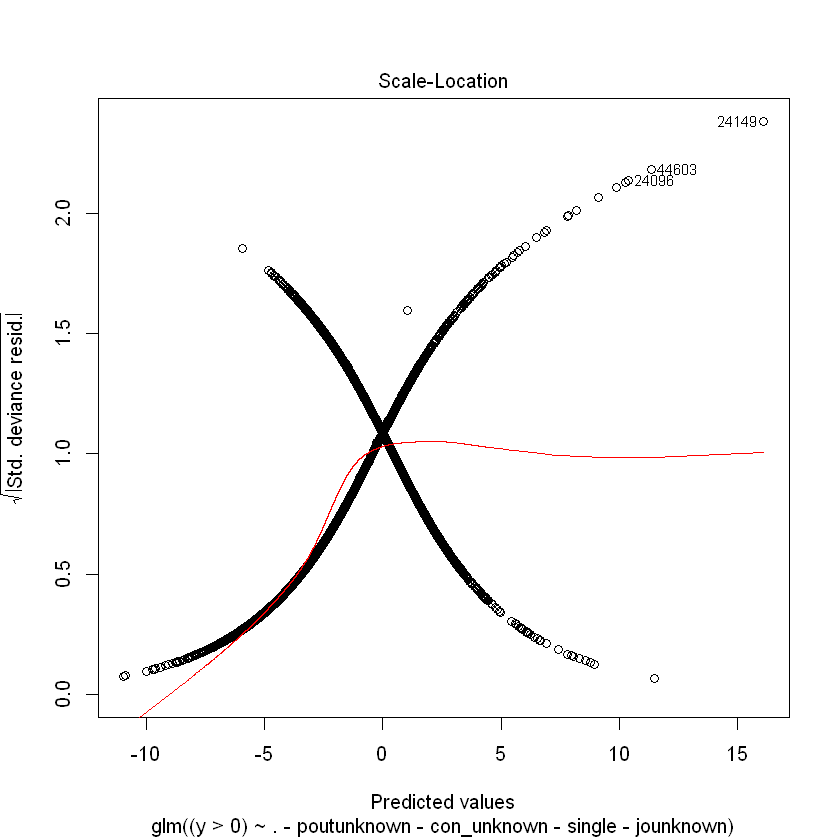

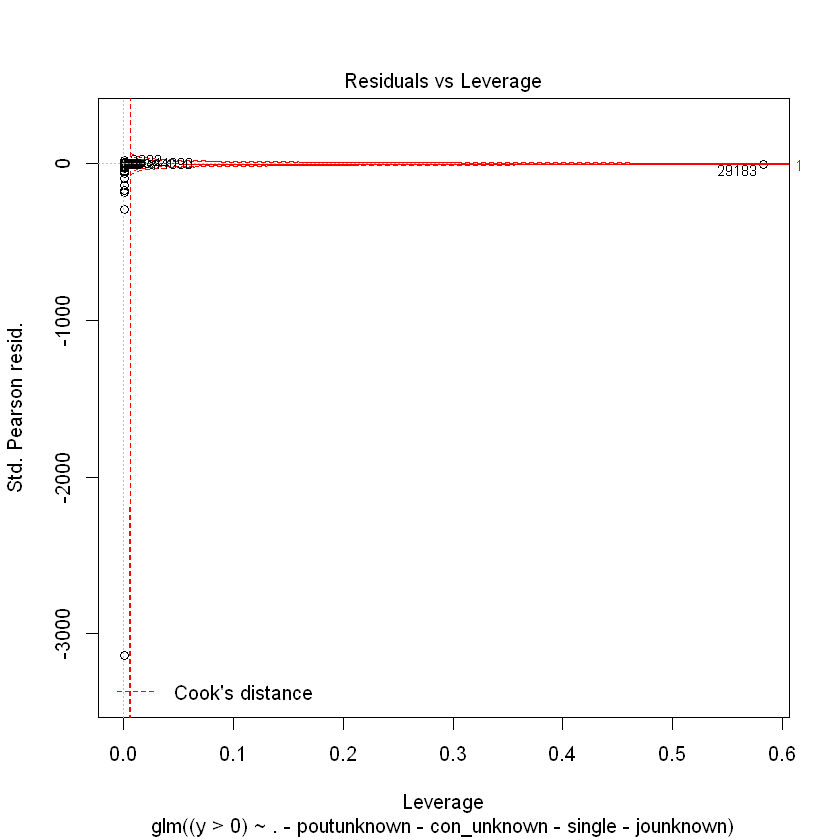

In [35]:
plot(final) # plotting view of data model we made

### Lets Check our probablity and prediction accuracy

In [36]:
fitted.probabilities <- predict(final,newdata=final.test,type='response')

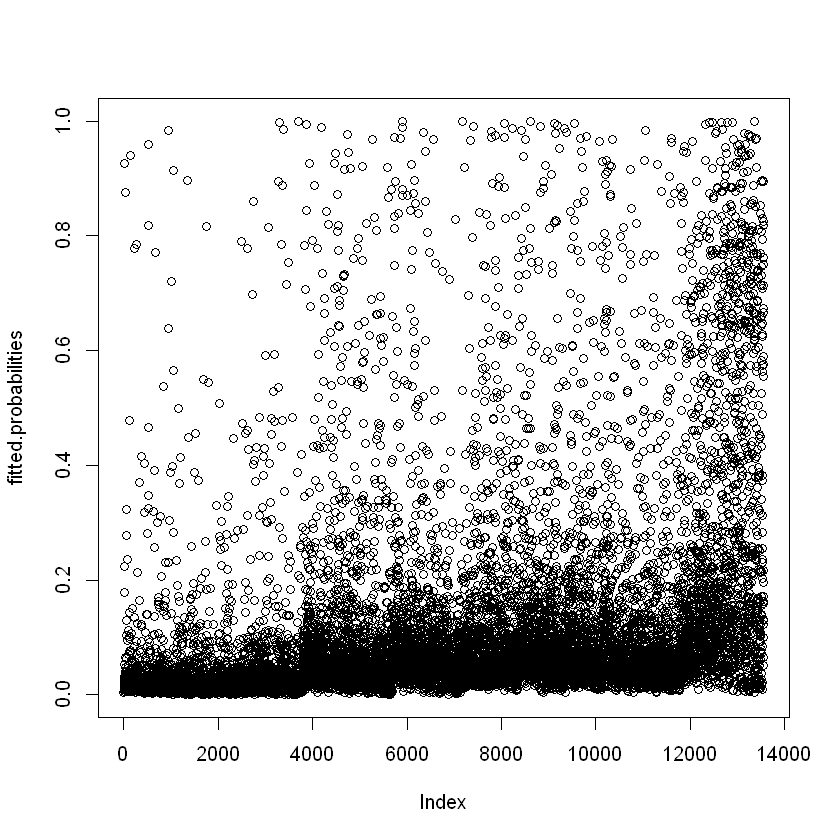

In [37]:
plot(fitted.probabilities) # like we can see our probabliteis values 

In [38]:
head(fitted.probabilities)

3          11          12          13          14          17 
0.004325199 0.024101304 0.020411987 0.051971980 0.008960947 0.017460263

In [40]:
fitted.results <- ifelse(fitted.probabilities > 0.5,1,0)
yes_no  <- ifelse(fitted.probabilities > 0.5, "Yes","No")

In [41]:
head(fitted.results) # will give result 0 or 1

3 11 12 13 14 17 
 0  0  0  0  0  0

In [44]:
misClasificError <- mean(fitted.results != final.test$y)

### Accuracy sencitivity and pecificity

In [45]:
print(paste('Accuracy',1-misClasificError)) # accuracy of our model is with 90% accuracy 

[1] "Accuracy 0.901503981126511"


In [47]:
threshold=0.5
predicted_values<-ifelse(predict(final,type="response")>threshold,1,0)
actual_values<-final$y
conf_matrix<-table(predicted_values,actual_values)
conf_matrix

                actual_values
predicted_values     0     1
               0 39013  3587
               1   909  1702

In [48]:
library('caret')

Warning message:
"package 'caret' was built under R version 3.6.3"

Attaching package: 'caret'


The following object is masked from 'package:survival':

    cluster




In [49]:
sensitivity(conf_matrix)

[1] 0.9772306

In [50]:
specificity(conf_matrix)

[1] 0.3218

### Roc Curve 

In [51]:
library(Epi)

Warning message:
"package 'Epi' was built under R version 3.6.3"


Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


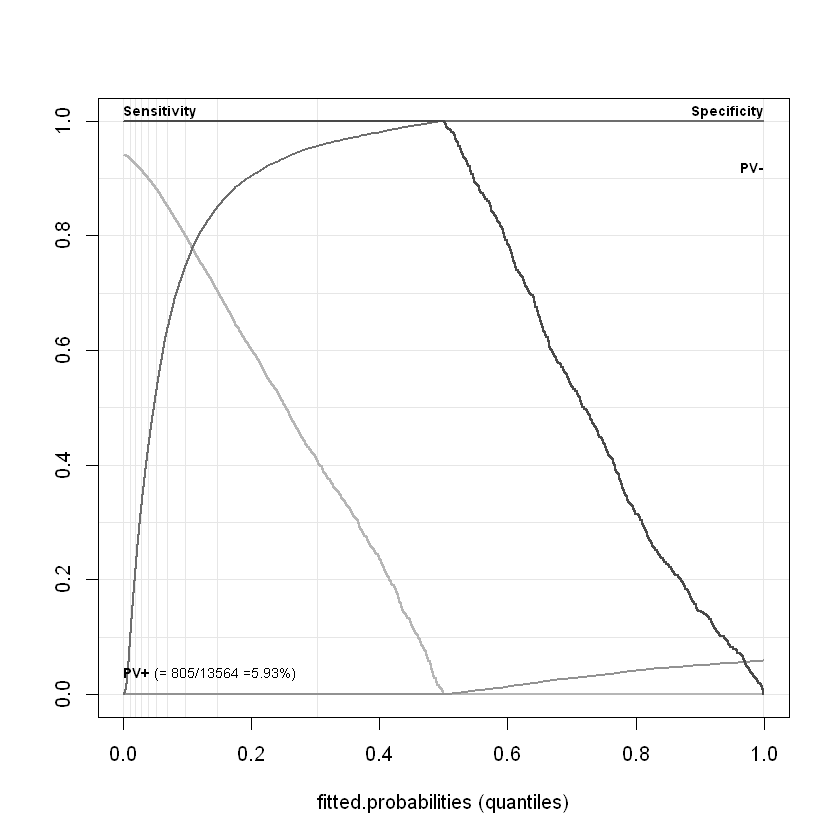

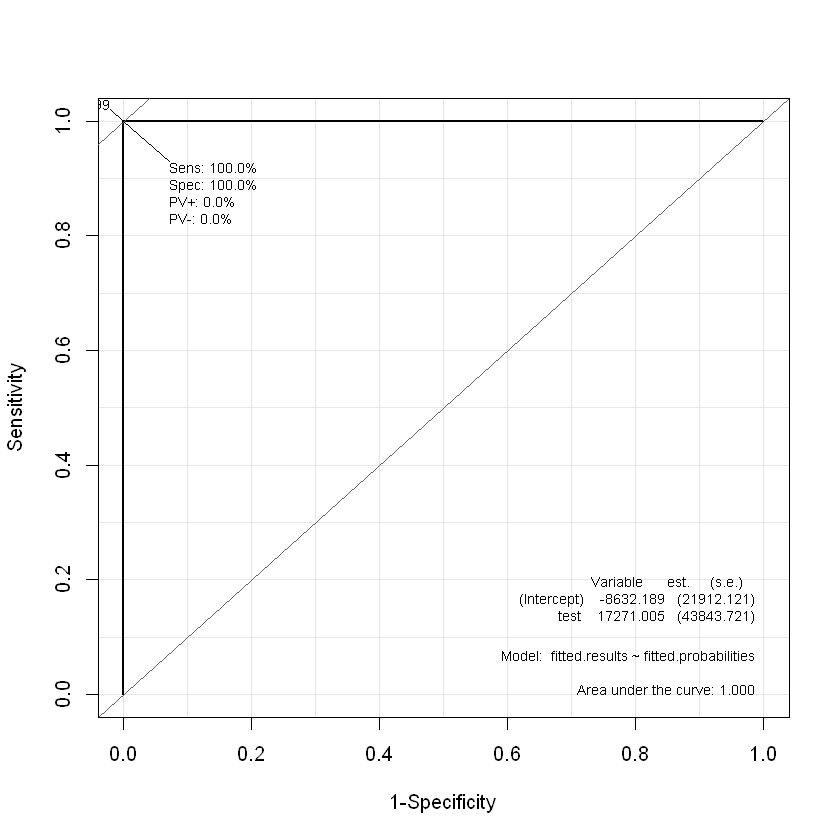

In [52]:
ROC(fitted.probabilities,fitted.results)

In [54]:
#lets check coefficient of our model
exp(coef(final))

(Intercept)             age         default         balance         housing 
     0.02118167      1.00035672      0.83339910      1.00001872      0.46043208 
           loan        duration        campaign           pdays        previous 
     0.56440759      1.00405573      0.89643728      1.00014415      1.01047743 
    poutfailure       poutother     poutsuccess    con_cellular   con_telephone 
     1.29208605      1.64624413     12.99778207      3.20841569      2.90721486 
       divorced         married        joadmin.   joblue.collar  joentrepreneur 
     0.83848631      0.71218751      1.34516468      0.84612577      0.89824815 
    johousemaid    jomanagement       joretired joself.employed      joservices 
     0.75757682      1.26874376      1.88051972      1.01981818      0.96378877 
      jostudent    jotechnician    jounemployed 
     2.24502192      1.06590788      1.08509561